In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import DateOffset

%matplotlib inline

import statsmodels.api as sm

/Users/owentemple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Create Super Dataset

#2012
fire_2012 = pd.read_csv('AFD_CY12 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2012.dropna(inplace=True)
fire_2012.index = pd.to_datetime(fire_2012.index)

#2013
fire_2013 = pd.read_csv('AFD_CY13 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2013.dropna(inplace=True)
fire_2013.index = pd.to_datetime(fire_2013.index)

#2014
fire_2014 = pd.read_csv('AFD_CY14 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2014.dropna(inplace=True)
fire_2014.index = pd.to_datetime(fire_2014.index)

#2015
fire_2015 = pd.read_csv('AFD_CY15 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2015.dropna(inplace=True)
fire_2015.index = pd.to_datetime(fire_2015.index)

#2016
fire_2016 = pd.read_csv('AFD_CY16 - SOC Fire Data Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2016.dropna(inplace=True)
fire_2016.index = pd.to_datetime(fire_2016.index)

#2017
fire_2017 = pd.read_csv('AFD_CY17 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2017.dropna(inplace=True)
fire_2017.index = pd.to_datetime(fire_2017.index)

final_df = pd.concat([fire_2012, fire_2013, fire_2014, fire_2015, fire_2016, fire_2017])


In [3]:
final_df.head()

,Master Incident Number,CalendarYear,Cancellation Status,General Dispatched Problem,Calltaker Agency (AFD or EMS),Order of AFD Arrival,Response Area (COA Only),First Arriving Unit Name,Response Status,PriorityDescription,EMS Time Phone Pickup,Earliest Time Phone Pickup,First Unit Assigned,Did not Reduce to Code 1,Onscene Time Was Correct,Latitude,Longitude,First Unit Enroute,First Unit Arrived
AFD Time Phone Pickup,,,,,,,,,,,,,,,,,,,
2012-01-01 00:01:22,12000002,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-2204,ENG66,Code 3,4F,-,01/01/2012 00:01:22,01/01/2012 00:01:58,No,Yes/Left Blank,30228693,97702907,01/01/2012 00:03:29,01/01/2012 00:05:11
2012-01-01 00:11:47,12000008,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2206,ENG22,Code 3,1M,-,01/01/2012 00:11:47,01/01/2012 00:12:36,No,Yes/Left Blank,30222216,97705176,01/01/2012 00:13:07,01/01/2012 00:15:13
2012-01-01 00:16:14,12000012,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2403,ENG24,Code 3,2M,-,01/01/2012 00:16:14,01/01/2012 00:16:40,No,Yes/Left Blank,30172163,97743423,01/01/2012 00:16:51,01/01/2012 00:19:44
2012-01-01 00:21:26,12000015,2012,Not Cancelled,Other,AFD,1st or Only AFD,00-3001,ENG30,Code 3,3F,-,01/01/2012 00:21:26,01/01/2012 00:22:13,No,Yes/Left Blank,30372899,97696675,01/01/2012 00:22:52,01/01/2012 00:26:35
2012-01-01 00:26:09,12000019,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-1902,QNT19,Code 3,4F,-,01/01/2012 00:26:09,01/01/2012 00:26:41,No,Yes/Left Blank,30352693,97776605,01/01/2012 00:27:43,01/01/2012 00:35:34


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302436 entries, 2012-01-01 00:01:22 to 2017-11-09 01:12:20
Data columns (total 19 columns):
Master Incident Number           302436 non-null int64
CalendarYear                     302436 non-null int64
Cancellation Status              302436 non-null object
General Dispatched Problem       302436 non-null object
Calltaker Agency (AFD or EMS)    302436 non-null object
Order of AFD Arrival             302436 non-null object
Response Area (COA Only)         302436 non-null object
First Arriving Unit Name         302436 non-null object
Response Status                  302436 non-null object
PriorityDescription              302436 non-null object
EMS Time Phone Pickup            302436 non-null object
Earliest Time Phone Pickup       302436 non-null object
First Unit Assigned              302436 non-null object
Did not Reduce to Code 1         302436 non-null object
Onscene Time Was Correct         302436 non-null object
Latitude         

In [5]:
final_df.describe()

,Master Incident Number,CalendarYear,Latitude,Longitude
count,3.024360e+05,302436.000000,3.024360e+05,3.024360e+05
mean,1.445339e+07,2014.393111,3.025670e+07,9.761881e+07
std,1.672434e+06,1.672922,1.051681e+06,3.384386e+06
min,1.000000e+00,2012.000000,0.000000e+00,0.000000e+00
25%,1.305387e+07,2013.000000,3.023244e+07,9.770031e+07
50%,1.410430e+07,2014.000000,3.028130e+07,9.773554e+07
75%,1.603886e+07,2016.000000,3.035207e+07,9.776438e+07
max,1.711014e+07,2017.000000,3.051518e+07,9.792725e+07


In [6]:
final_df['Response Area (COA Only)'].value_counts().sort_index()

00-0020        1
00-0040       70
00-0060       37
00-0070       74
00-0080       11
00-0090        2
00-0101    11356
00-0102     8173
00-0103       16
00-0201     2911
00-0202     2171
00-0203     1358
00-0301     2675
00-0302     1194
00-0303     1708
00-0401     2201
00-0402      291
00-0501     4206
00-0502     2046
00-0503      485
00-0504     1019
00-0505      987
00-0601     3079
00-0602     1032
00-0603     2482
00-0604     1452
00-0701     5455
00-0702     2516
00-0801     2656
00-0802     1481
           ...  
00-4502      397
00-4503      283
00-4504      337
00-4505      241
00-4506      116
00-4507       27
00-4508       43
00-4601       21
00-4602       73
00-4603       21
00-4604        5
00-4605       18
00-4606       81
00-4607       51
00-4608       78
00-4609      158
00-4610       24
00-4703        1
04-2304        2
04-2604        9
04-2605        1
04-2608        1
04-2609        3
04-2801        1
04-2808        1
04-4103        1
04-4406        1
04-4701       

In [7]:
final_df['First Unit Arrived']

AFD Time Phone Pickup
2012-01-01 00:01:22    01/01/2012 00:05:11
2012-01-01 00:11:47    01/01/2012 00:15:13
2012-01-01 00:16:14    01/01/2012 00:19:44
2012-01-01 00:21:26    01/01/2012 00:26:35
2012-01-01 00:26:09    01/01/2012 00:35:34
2012-01-01 00:35:36    01/01/2012 00:43:17
2012-01-01 00:44:26    01/01/2012 00:50:06
2012-01-01 00:46:52    01/01/2012 00:54:59
2012-01-01 00:55:57    01/01/2012 01:01:13
2012-01-01 01:02:24    01/01/2012 01:06:51
2012-01-01 01:03:25    01/01/2012 01:12:33
2012-01-01 01:21:28    01/01/2012 01:25:48
2012-01-01 01:28:31    01/01/2012 01:31:26
2012-01-01 01:28:48    01/01/2012 01:37:16
2012-01-01 01:32:39    01/01/2012 01:38:08
2012-01-01 01:37:32    01/01/2012 01:44:08
2012-01-01 01:55:42    01/01/2012 02:00:25
2012-01-01 02:01:08    01/01/2012 02:06:55
2012-01-01 02:11:47    01/01/2012 02:16:47
2012-01-01 02:13:14    01/01/2012 02:16:24
2012-01-01 02:14:53    01/01/2012 02:20:37
2012-01-01 02:16:48    01/01/2012 02:24:00
2012-01-01 02:18:25    01/01/201

In [8]:
final_df['First Unit Arrived'] = pd.to_datetime(final_df['First Unit Arrived'])

In [9]:
final_df['First Unit Arrived']

AFD Time Phone Pickup
2012-01-01 00:01:22   2012-01-01 00:05:11
2012-01-01 00:11:47   2012-01-01 00:15:13
2012-01-01 00:16:14   2012-01-01 00:19:44
2012-01-01 00:21:26   2012-01-01 00:26:35
2012-01-01 00:26:09   2012-01-01 00:35:34
2012-01-01 00:35:36   2012-01-01 00:43:17
2012-01-01 00:44:26   2012-01-01 00:50:06
2012-01-01 00:46:52   2012-01-01 00:54:59
2012-01-01 00:55:57   2012-01-01 01:01:13
2012-01-01 01:02:24   2012-01-01 01:06:51
2012-01-01 01:03:25   2012-01-01 01:12:33
2012-01-01 01:21:28   2012-01-01 01:25:48
2012-01-01 01:28:31   2012-01-01 01:31:26
2012-01-01 01:28:48   2012-01-01 01:37:16
2012-01-01 01:32:39   2012-01-01 01:38:08
2012-01-01 01:37:32   2012-01-01 01:44:08
2012-01-01 01:55:42   2012-01-01 02:00:25
2012-01-01 02:01:08   2012-01-01 02:06:55
2012-01-01 02:11:47   2012-01-01 02:16:47
2012-01-01 02:13:14   2012-01-01 02:16:24
2012-01-01 02:14:53   2012-01-01 02:20:37
2012-01-01 02:16:48   2012-01-01 02:24:00
2012-01-01 02:18:25   2012-01-01 02:22:15
2012-01-01 0

In [10]:
final_df['Response Time (s)'] = (final_df['First Unit Arrived'] - final_df.index).astype('timedelta64[s]')
final_df['Response Time (m)'] = ((final_df['First Unit Arrived'] - final_df.index).astype('timedelta64[s]'))/60

In [11]:
final_df.head()

,Master Incident Number,CalendarYear,Cancellation Status,General Dispatched Problem,Calltaker Agency (AFD or EMS),Order of AFD Arrival,Response Area (COA Only),First Arriving Unit Name,Response Status,PriorityDescription,...,Earliest Time Phone Pickup,First Unit Assigned,Did not Reduce to Code 1,Onscene Time Was Correct,Latitude,Longitude,First Unit Enroute,First Unit Arrived,Response Time (s),Response Time (m)
AFD Time Phone Pickup,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:01:22,12000002,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-2204,ENG66,Code 3,4F,...,01/01/2012 00:01:22,01/01/2012 00:01:58,No,Yes/Left Blank,30228693,97702907,01/01/2012 00:03:29,2012-01-01 00:05:11,229.0,3.816667
2012-01-01 00:11:47,12000008,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2206,ENG22,Code 3,1M,...,01/01/2012 00:11:47,01/01/2012 00:12:36,No,Yes/Left Blank,30222216,97705176,01/01/2012 00:13:07,2012-01-01 00:15:13,206.0,3.433333
2012-01-01 00:16:14,12000012,2012,Not Cancelled,Medical,EMS,1st or Only AFD,00-2403,ENG24,Code 3,2M,...,01/01/2012 00:16:14,01/01/2012 00:16:40,No,Yes/Left Blank,30172163,97743423,01/01/2012 00:16:51,2012-01-01 00:19:44,210.0,3.500000
2012-01-01 00:21:26,12000015,2012,Not Cancelled,Other,AFD,1st or Only AFD,00-3001,ENG30,Code 3,3F,...,01/01/2012 00:21:26,01/01/2012 00:22:13,No,Yes/Left Blank,30372899,97696675,01/01/2012 00:22:52,2012-01-01 00:26:35,309.0,5.150000
2012-01-01 00:26:09,12000019,2012,Not Cancelled,Fire,AFD,1st or Only AFD,00-1902,QNT19,Code 3,4F,...,01/01/2012 00:26:09,01/01/2012 00:26:41,No,Yes/Left Blank,30352693,97776605,01/01/2012 00:27:43,2012-01-01 00:35:34,565.0,9.416667


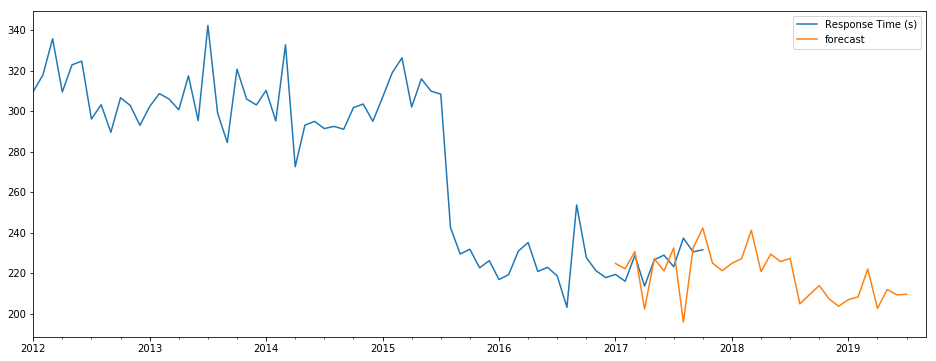

In [22]:
#Create Dataframe
RA__00_01XX_df = final_df[final_df['Response Area (COA Only)'].str.startswith('00-01')]

#Group By Month and create new dataframe
RA__00_01XX_month_df = RA__00_01XX_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
RA__00_01XX_month_df.columns = ['Response Time (s)']
#Drop the last column. Its an outlier
RA__00_01XX_month_df.drop(RA__00_01XX_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA__00_01XX_month_df['Response Time (s)'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA__00_01XX_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_01XX_month_df.columns)

future_final_df = pd.concat([RA__00_01XX_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)


future_final_df[['Response Time (s)', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('Response Time Prediction for RA 00-01XX.csv')

## Moore's Crossing

In [23]:
#Create Dataframe
RA__00_4209_df = final_df[(final_df['Response Area (COA Only)']=='00-4209')]

#Group By Month and create new dataframe
RA__00_4209_month_df = RA__00_4209_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
RA__00_4209_month_df.columns = ['Response Time (s)']
#Drop the last column. Its an outlier
RA__00_4209_month_df.drop(RA__00_4209_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA__00_4209_month_df['Response Time (s)'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA__00_4209_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_4209_month_df.columns)

future_final_df = pd.concat([RA__00_4209_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)


future_final_df[['Response Time (s)', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('Response Time Prediction for RA 00-4209.csv')

ValueError: maxlag should be < nobs

In [ ]:
#00-01XX Downtown
#00-4209 Moore's Crossing

#00-2608
#00-0504 Eastern Crescent
#00-0505 Eastern Crescent

#00-2405
#00-2404
#00-2403

## Eastern Crescent

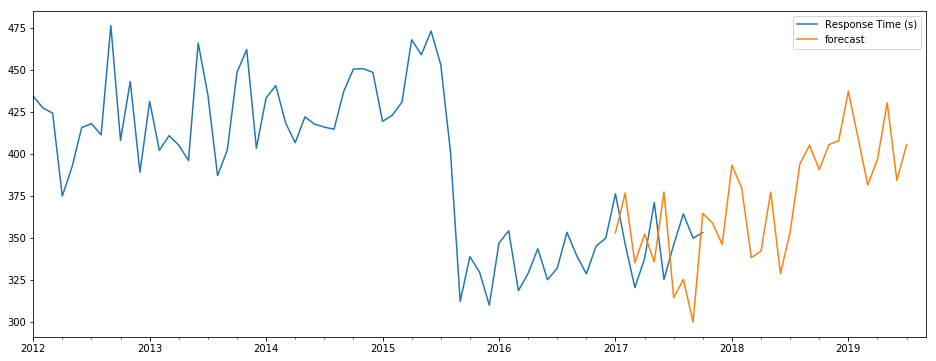

In [24]:
#Create Dataframe
RA__00_EC_df = final_df[(final_df['Response Area (COA Only)']=='00-2606')|\
                        (final_df['Response Area (COA Only)']=='00-2608')|\
                        (final_df['Response Area (COA Only)']=='00-0504')|\
                        (final_df['Response Area (COA Only)']=='00-0505')]

#Group By Month and create new dataframe
RA__00_EC_month_df = RA__00_EC_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
RA__00_EC_month_df.columns = ['Response Time (s)']
#Drop the last column. Its an outlier
RA__00_EC_month_df.drop(RA__00_EC_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA__00_EC_month_df['Response Time (s)'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA__00_EC_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_EC_month_df.columns)

future_final_df = pd.concat([RA__00_EC_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)


future_final_df[['Response Time (s)', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('Response Time Prediction for RA 00-EC.csv')


In [18]:
RA__00_EC_month_df

,Response Time (s)
AFD Time Phone Pickup,
2012-01-31,94
2012-02-29,69
2012-03-31,89
2012-04-30,62
2012-05-31,98
2012-06-30,76
2012-07-31,84
2012-08-31,92
2012-09-30,77


## Goodnight

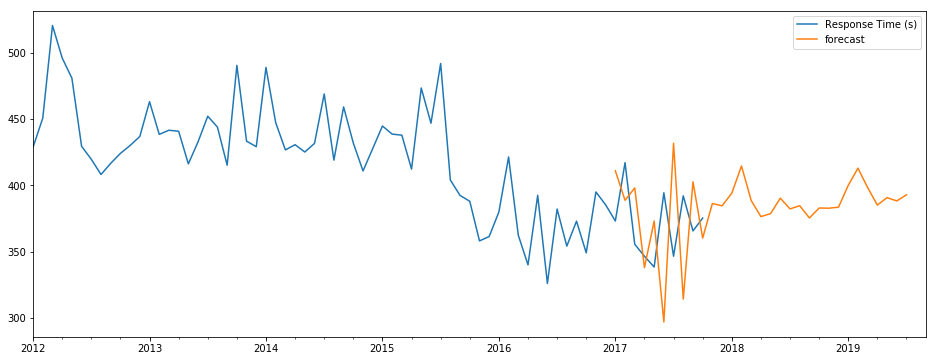

In [25]:
#Create Dataframe
RA__00_GN_df = final_df[(final_df['Response Area (COA Only)']=='00-2405')|\
                        (final_df['Response Area (COA Only)']=='00-2404')|\
                        (final_df['Response Area (COA Only)']=='00-2403')]

#Group By Month and create new dataframe
RA__00_GN_month_df = RA__00_GN_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
RA__00_GN_month_df.columns = ['Response Time (s)']
#Drop the last column. Its an outlier
RA__00_GN_month_df.drop(RA__00_GN_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA__00_GN_month_df['Response Time (s)'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA__00_GN_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_GN_month_df.columns)

future_final_df = pd.concat([RA__00_GN_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)


future_final_df[['Response Time (s)', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('Response Time Prediction for RA 00-GN.csv')